In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Important Library Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn

Dataset load

In [4]:
df=pd.read_csv("/content/drive/MyDrive/NSU/HAR/AllData.csv")

In [5]:
df.head(200)

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,Eating
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,Eating
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,Eating
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,Eating
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,Eating
...,...,...,...,...,...,...,...,...,...
195,1.560000e+12,-0.415161,0.886719,-0.390259,-4.024390,-3.384146,22.408537,4,Eating
196,1.560000e+12,-0.360596,0.836304,-0.378174,-18.506098,4.451220,3.993902,4,Eating
197,1.560000e+12,-0.408447,0.833862,-0.339233,-17.713415,6.463415,-1.463415,4,Eating
198,1.560000e+12,-0.367920,0.877563,-0.336914,-8.780488,1.615854,8.628049,4,Eating


In [6]:
df=df.drop('Person',axis=1)
df=df.drop('Time',axis=1)

In [7]:
df

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Class
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,Eating
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,Eating
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,Eating
3,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,Eating
4,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,Eating
...,...,...,...,...,...,...,...
72089,-0.945923,-0.182861,0.105103,-70.457317,-11.829268,11.463415,Walking
72090,-0.898315,-0.176880,0.078857,-71.280488,-11.890244,10.884146,Walking
72091,-0.863159,-0.199097,0.086548,-71.676829,-19.390244,-1.006098,Walking
72092,-0.904907,-0.189941,0.088989,-58.963415,-10.152439,25.731707,Walking


Dataset shape (Number of row, number of column)

In [8]:
df.shape

(72094, 7)

label is the target column which we need to predict

In [9]:
df['Class'].value_counts()

Speak and Walk    18673
Staying           16453
Walking           14541
Speaking          12867
Eating             9560
Name: Class, dtype: int64

In [10]:
df.isnull().sum() #find missing data

Acc_x    0
Acc_y    0
Acc_z    0
Gry_x    0
Gry_y    0
Gry_Z    0
Class    0
dtype: int64

In [11]:
df.isnull().values.any() #no missing data

False

In [12]:
df.describe() #feature engineering

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
count,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000
mean,-0.447154,0.402126,-0.189126,-2.895353,-0.584548,-0.605051
std,0.572069,0.465418,0.210580,42.258991,41.297331,27.830226
min,-1.283447,-1.066040,-1.184326,-588.658537,-664.634146,-340.792683
25%,-0.863892,-0.031494,-0.349243,-11.615854,-10.091463,-8.864329
50%,-0.743408,0.556519,-0.214478,-5.274390,0.000000,1.006098
75%,-0.036987,0.782440,-0.057495,4.359756,4.756098,8.445122
max,1.146362,1.199951,0.564331,414.878049,625.335366,504.054878


In [13]:
df.corr() #feature selection

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
Acc_x,1.000000,0.576228,-0.427687,0.047156,0.064115,0.018388
Acc_y,0.576228,1.000000,-0.749424,-0.033066,0.006125,0.054869
Acc_z,-0.427687,-0.749424,1.000000,0.041120,-0.007340,-0.028219
Gry_x,0.047156,-0.033066,0.041120,1.000000,0.114890,-0.113659
Gry_y,0.064115,0.006125,-0.007340,0.114890,1.000000,-0.383033
Gry_Z,0.018388,0.054869,-0.028219,-0.113659,-0.383033,1.000000


Feature Selection heatmap

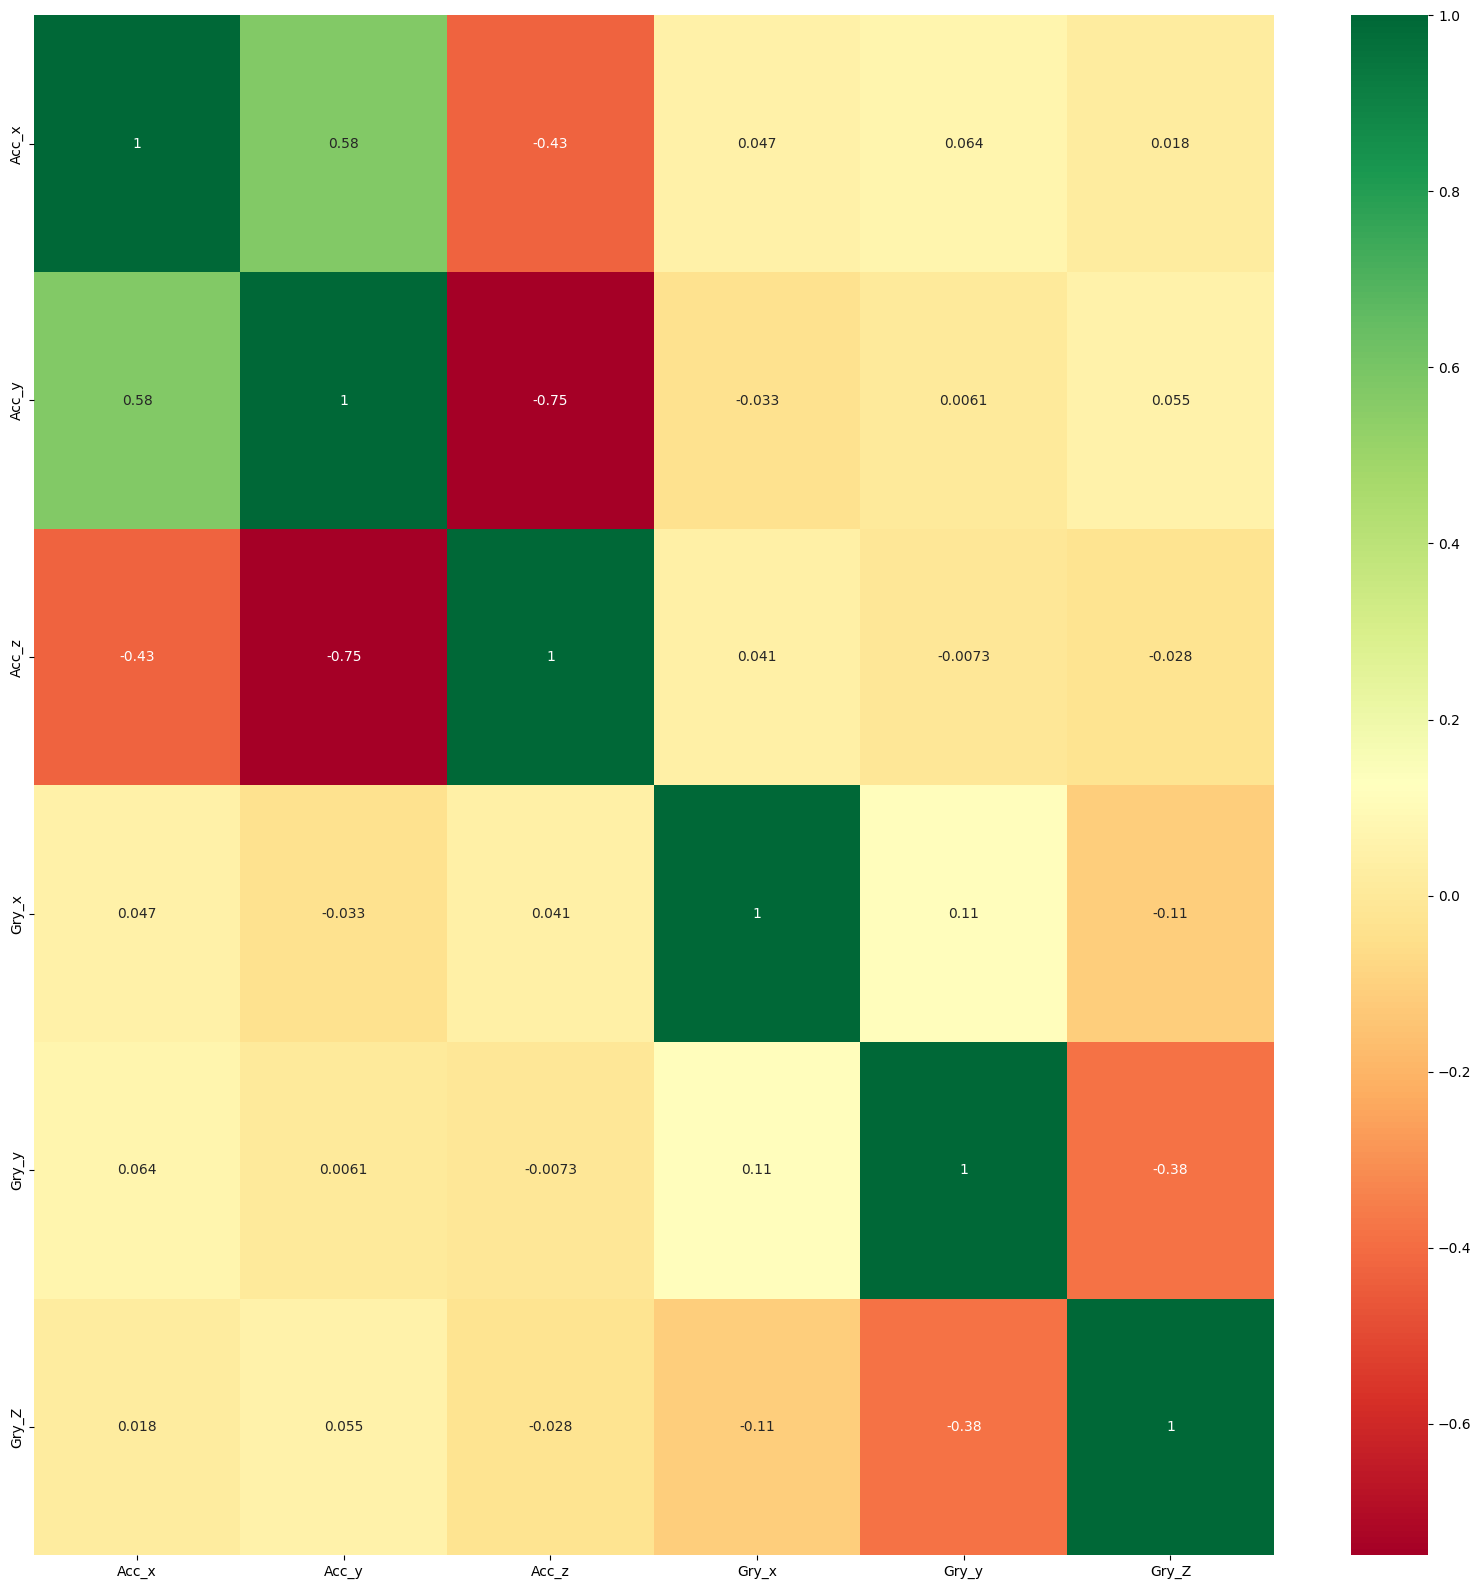

In [14]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Extract statistical features

In [15]:
# Extract the accelerometer and gyroscope data into separate arrays
acc_data = df[['Acc_x', 'Acc_y', 'Acc_z']].values
gyro_data = df[['Gry_x', 'Gry_y', 'Gry_Z']].values


In [16]:
from scipy.stats import skew, kurtosis

In [17]:
# Extracting 20 statistical features for each sensor column
for col in ['Acc_x', 'Acc_y', 'Acc_z', 'Gry_x', 'Gry_y', 'Gry_Z']:
    # Mean, Standard Deviation, Variance
    df[f'{col}_mean'] = df[col].mean()
    df[f'{col}_std'] = df[col].std()
    df[f'{col}_var'] = df[col].var()

    # Min, Max, Median
    df[f'{col}_min'] = df[col].min()
    df[f'{col}_max'] = df[col].max()
    df[f'{col}_median'] = df[col].median()

    # Skewness, Kurtosis
    df[f'{col}_skew'] = df[col].skew()
    df[f'{col}_kurtosis'] = df[col].kurtosis()

    # 1st quartile, 3rd quartile
    df[f'{col}_q1'] = df[col].quantile(0.25)
    df[f'{col}_q3'] = df[col].quantile(0.75)

    # Interquartile range
    df[f'{col}_IQR'] = df[f'{col}_q3'] - df[f'{col}_q1']

    # Signal magnitude area
    df[f'{col}_sma'] = df[col].abs().sum()

    # Energy (sum of squares)
    df[f'{col}_energy'] = np.square(df[col]).sum()

    # Root mean square
    df[f'{col}_rms'] = np.sqrt(np.square(df[col]).mean())

In [18]:
pip install catboost

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [20]:
# Models dictionary (you can expand or modify this as needed)
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'MLP': MLPClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
}

In [21]:
# Split data into training and testing
X = df.drop('Class', axis=1)
y = df['Class']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [23]:
y_encoded

array([0, 0, 0, ..., 4, 4, 4])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 57675, number of used features: 6
[LightGBM] [Info] Start training from score -2.016725
[LightGBM] [Info] Start training from score -1.348776
[LightGBM] [Info] Start training from score -1.731946
[LightGBM] [Info] Start training from score -1.474834
[LightGBM] [Info] Start training from score -1.601494


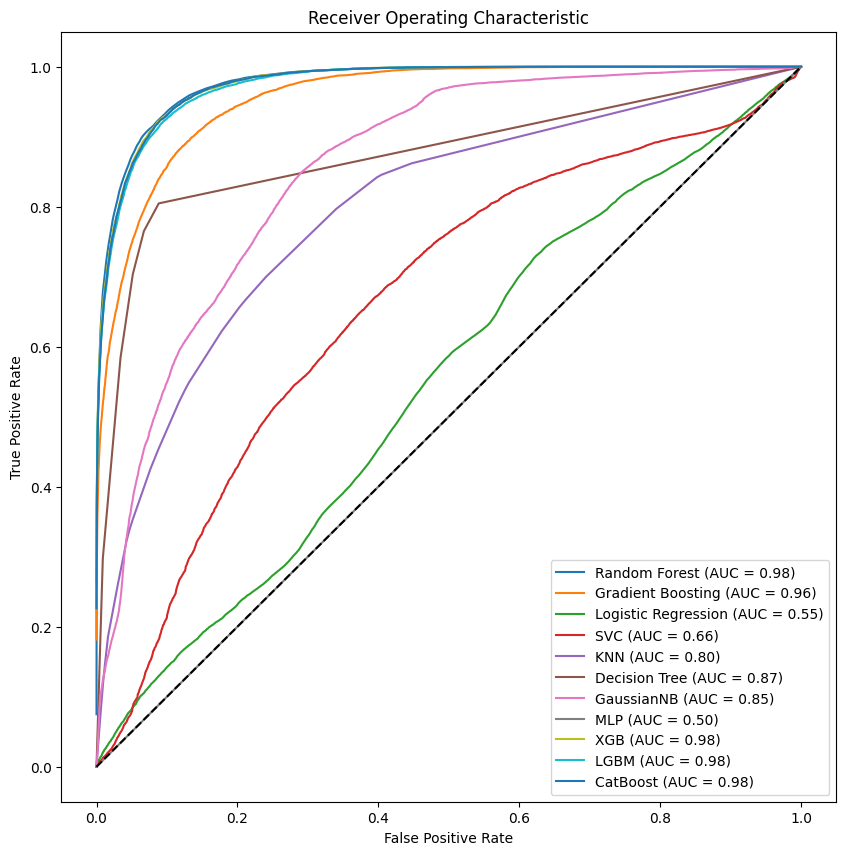

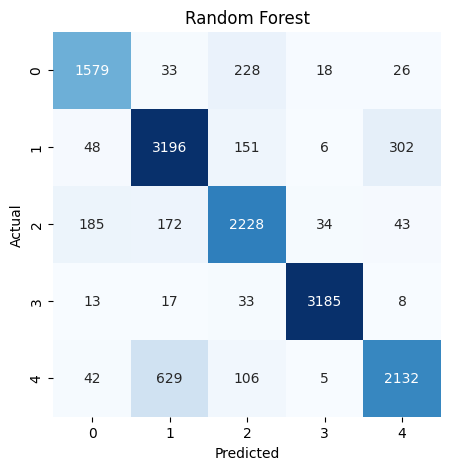

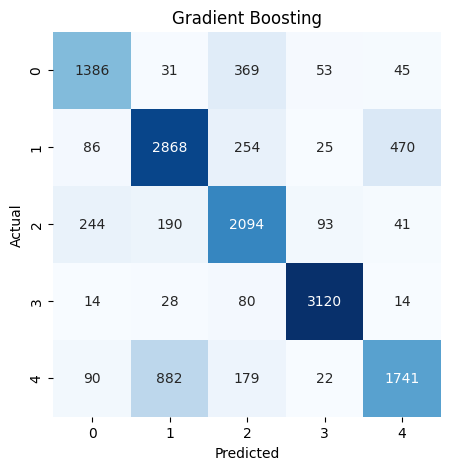

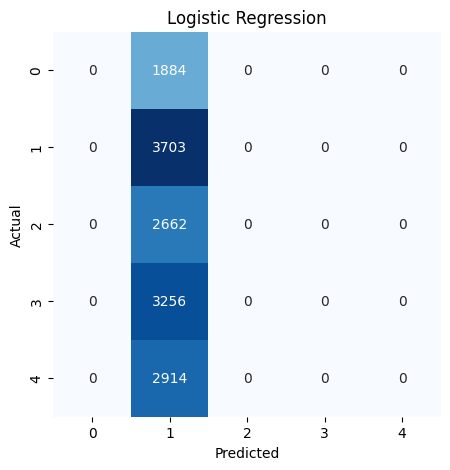

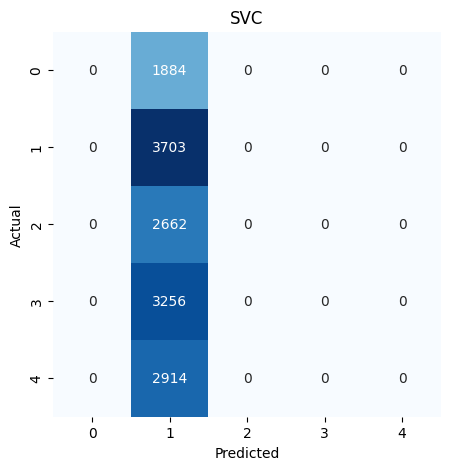

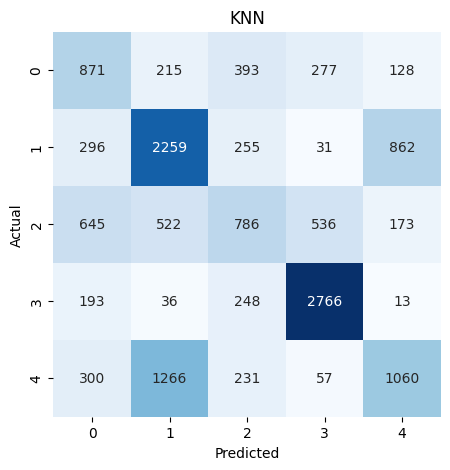

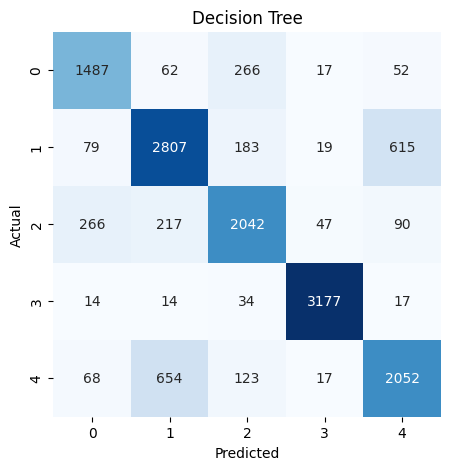

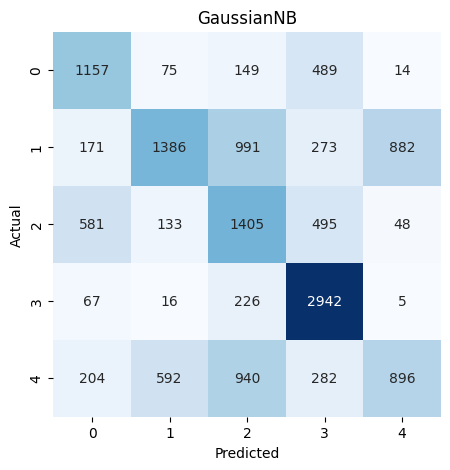

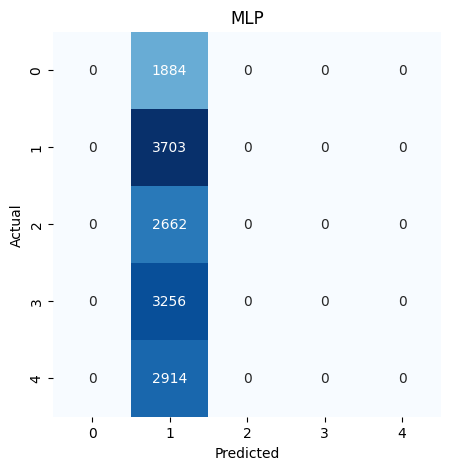

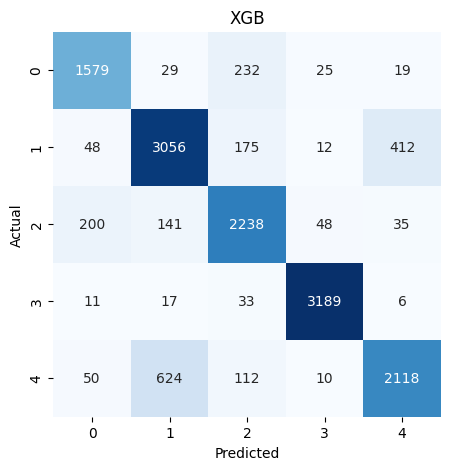

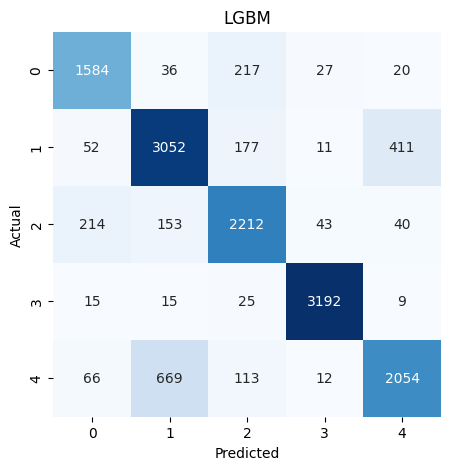

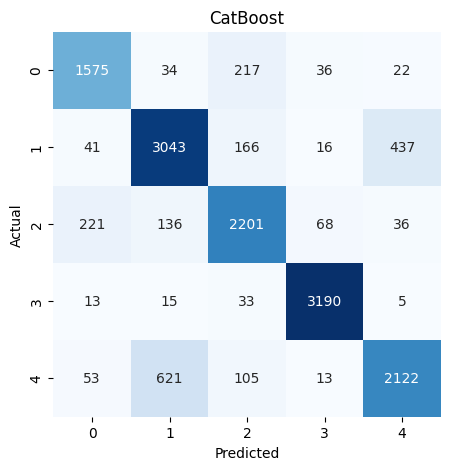

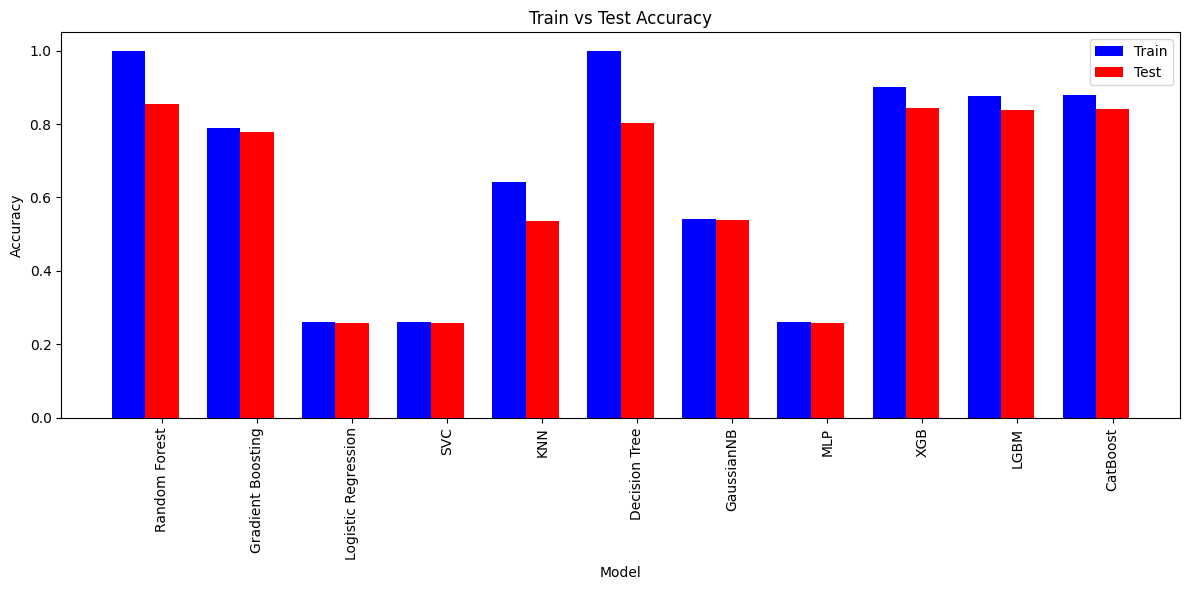

In [24]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variables to store metrics for all models
roc_auc_all = {}
fpr_all = {}
tpr_all = {}
accuracy_train_all = {}
accuracy_test_all = {}

from sklearn.preprocessing import label_binarize

# Convert y_test and y_train into one-hot encoding
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4])
y_train_bin = label_binarize(y_train, classes=[0,1,2,3,4])

n_classes = y_test_bin.shape[1]

# Train models and gather metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Average ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr_all[model_name] = all_fpr
    tpr_all[model_name] = mean_tpr
    roc_auc_all[model_name] = auc(all_fpr, mean_tpr)
    accuracy_train_all[model_name] = model.score(X_train, y_train)
    accuracy_test_all[model_name] = model.score(X_test, y_test)

# Plot ROC curves
plt.figure(figsize=(10, 10))
for model_name in models.keys():
    plt.plot(fpr_all[model_name], tpr_all[model_name], label='%s (AUC = %0.2f)' % (model_name, roc_auc_all[model_name]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot heatmaps for confusion matrices
for model_name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot training vs testing accuracy for each model
names = list(models.keys())
train_accuracy = [accuracy_train_all[name] for name in names]
test_accuracy = [accuracy_test_all[name] for name in names]

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(names))

bar1 = plt.bar(index, train_accuracy, bar_width, label='Train', color='b')
bar2 = plt.bar(index + bar_width, test_accuracy, bar_width, label='Test', color='r')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.xticks(index + bar_width, names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.2 MB/s eta 0:00:00


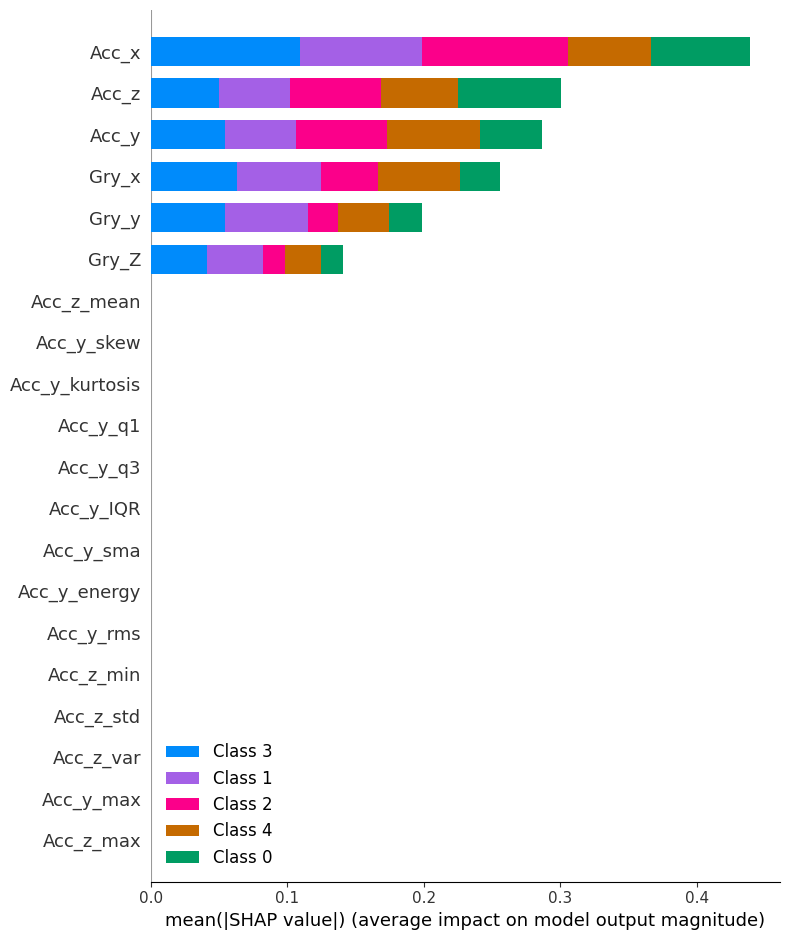

In [29]:
import shap

# Extract the Random Forest model from your models dictionary
rf = models['Random Forest']

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)
